In [184]:
# apply doc2vec (using title, description columns)
# tried to cluster job titles

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [185]:
import pandas as pd

file_name = 'hidden'
data = pd.read_csv(file_name, low_memory = False, index_col = 0)

In [186]:
documents = {}

def extract_titles (row):
    global documents
    if row['description'] and row['description'] == row['description']:
        documents[row['title']] = text_to_word_sequence(row['description'])

In [187]:
data.apply(extract_titles, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
495    None
496    None
497    None
498    None
499    None
Length: 500, dtype: object

In [188]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaeun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [189]:
# from title_analysis_keras.ipynb
real_symbol_list = ['ş', '8', '₿', '•', '·', 'z', '\xad', '5', 'r', 'p', 'o', 'n', '◆', '►', '🔎', 'g', '1', '4', '6', '9', 'y', '●', '∞', '\xa0', 'f', "'", 'u', 'ר', '0', '⇉', '−', 'm', '\u200e', 'à', '»', '🤫', '＆', '¦', 'k', 'b', '\x96', 'l', 'i', '➟', '✦', 't', '➢', '7', '§', 'в', '‐', '➲', 'j', '★', '\u202c', 'd', '\u200b', 'c', 'e', '◊', '—', '«', 'w', '∙', '\x03', 'v', 'ι', '↔', '♛', '⇒', '♦', '3', '➣', '™', '│', 'и', '–', 'h', 'q']

from os import remove
from nltk.corpus import stopwords

word_list = []
stop_words = set(stopwords.words('english'))

for key, description in documents.items():
    new_description = []
    for word in description:
        if word not in stop_words and word not in real_symbol_list:
            new_description.append(word)
        documents[key] = new_description

In [190]:
titles = []
for title, description in documents.items():
    titles.append(title)

indexed_titles = []
for i in range(len(titles)):
    new_title = str(i) + "_" + titles[i]
    indexed_titles.append(new_title)

In [191]:
train = [TaggedDocument(words = documents[titles[i]], tags = titles[i]) for i in range(len(titles))]

In [192]:
model = Doc2Vec(vector_size = 10, window = 3, epochs = 40, min_count = 1)
model.build_vocab(train)
model.train(train, total_examples=len(train), epochs=50)

In [193]:
inferreds = []

for i in range(len(titles)):
    inferred = model.infer_vector(documents[titles[i]])
    inferreds.append(inferred)

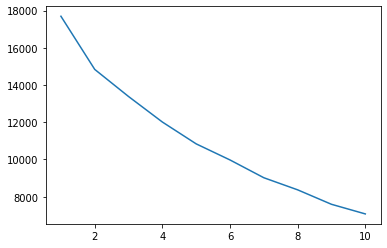

In [194]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(inferreds)
    inertia.append(model.inertia_)

plt.plot(range(1, 11), inertia)
plt.show()

In [195]:
n = 2

clustering = KMeans(n_clusters=n)
clustering.fit(inferreds)

KMeans(n_clusters=2)

In [196]:
cluster_dict = {i:[] for i in range(0, n)}
for i in range(len(titles)):
    cluster_dict[clustering.labels_[i]].append(titles[i])

cluster_dict

{0: ['Founder & CEO',
  'Director',
  'President/Chief Executive Officer',
  'Owner & Founder',
  'Head Of Operations',
  'Advisor',
  'Product Lead',
  'Managing Director',
  'Investor',
  'Partner & CEO',
  'CEO',
  'Director CFO',
  'Chief Financial Officer',
  'CEO and Chairman',
  'Principal',
  'Corporate Development',
  'Co-founder',
  'Founder',
  'Co-Founder and Owner',
  'General Counsel',
  'Co-founder, Managing Partner, Software SME',
  'Member of the Board of Trustees',
  'General Manager',
  'Chief Scientific Officer',
  'Non Executive Director',
  'President and Chief Executive Officer',
  'Managing Director - UK & Europe',
  'Founder, Managing Director of Strategy & Corporate Development',
  'Founder and CEO',
  'VP Development',
  'Technology Director of Identity Services',
  'Founder & COO',
  'Director of Business Development, DNA Production',
  'CFO',
  'Co-founder & Director',
  'Faculty',
  'Operations Manager',
  'Chief Technology Officer',
  'Technology Broker',